Dataset loaded successfully!

Dataset Info:
   Patient ID  Glucose Level (mg/dL)  Age  Label (1=Disease, 0=Healthy)
0         101                    145   58                             1
1         102                     90   25                             0
2         103                    110   45                             0
3         104                    180   62                             1
4         105                     95   30                             0

Shape: (5, 4)

Class distribution:
Label (1=Disease, 0=Healthy)
0    3
1    2
Name: count, dtype: int64

Feature matrix shape (with bias): (5, 3)
Target vector shape: (5,)

TRAINING LOGISTIC REGRESSION MODEL
Iteration 0: Cost = 0.652064
Iteration 100: Cost = 0.116812
Iteration 200: Cost = 0.074087
Iteration 300: Cost = 0.055725
Iteration 400: Cost = 0.045059
Iteration 500: Cost = 0.037969
Iteration 600: Cost = 0.032872
Iteration 700: Cost = 0.029013
Iteration 800: Cost = 0.025982
Iteration 900: Cost = 0.023534
Iterati

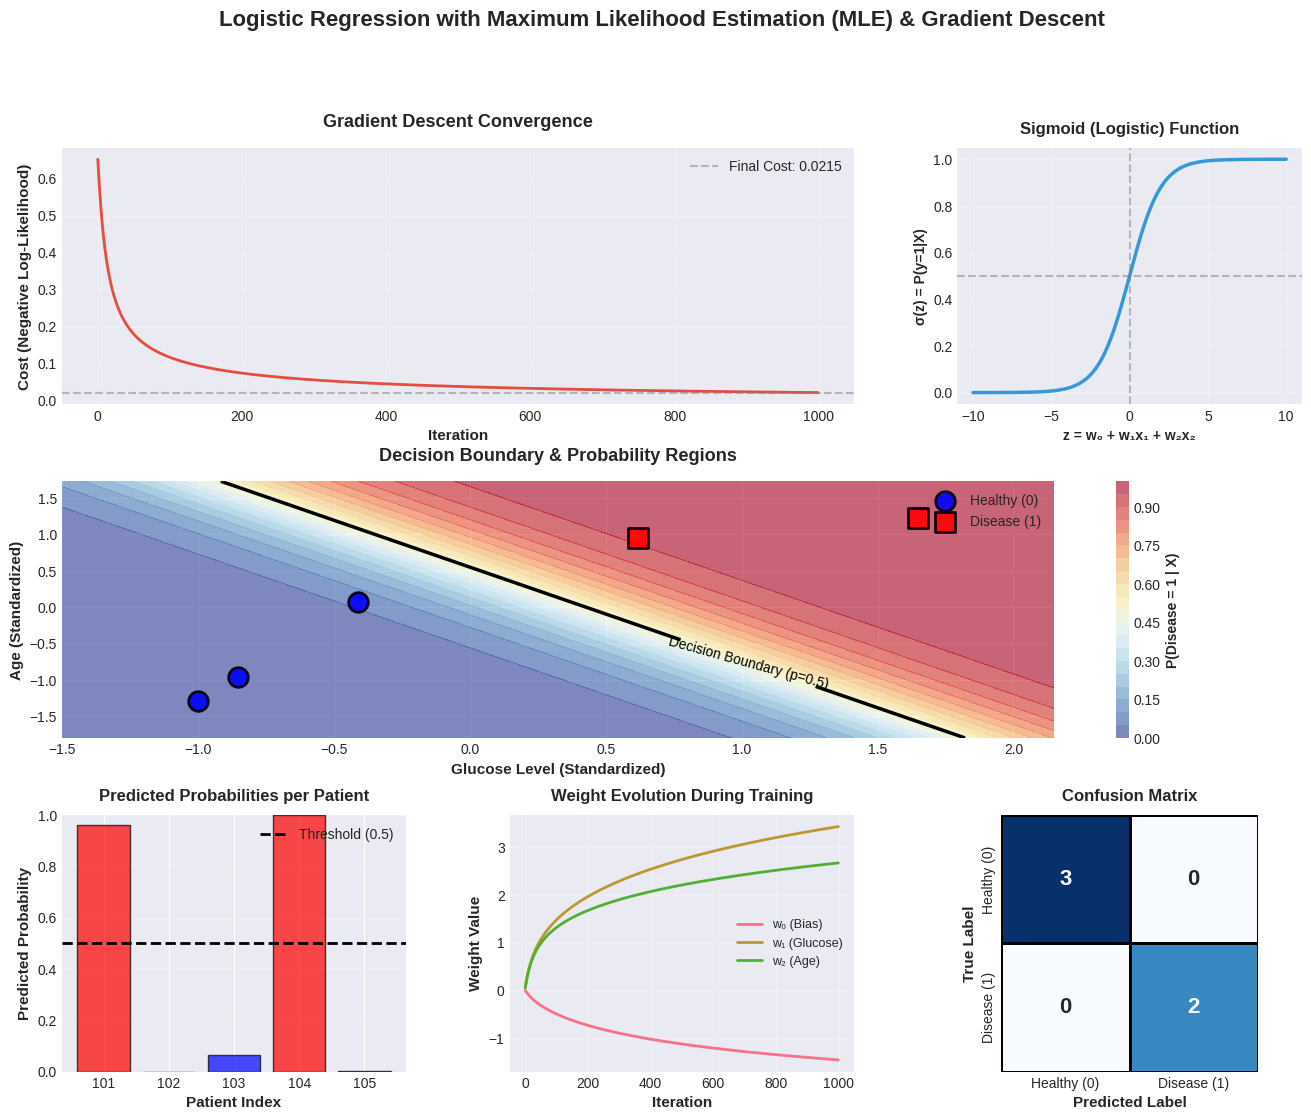


SUMMARY

The logistic regression model uses:
1. SIGMOID FUNCTION: Maps linear combination to probability (0,1)
   σ(z) = 1 / (1 + e^(-z))

2. MAXIMUM LIKELIHOOD ESTIMATION (MLE): 
   Maximizes the likelihood of observing the data
   Equivalent to minimizing negative log-likelihood:
   Cost = -1/m * Σ[y*log(h) + (1-y)*log(1-h)]

3. GRADIENT DESCENT OPTIMIZATION:
   Iteratively updates weights to minimize cost
   w := w - α * ∇J(w)
   
The model successfully learned to classify patients based on
glucose levels and age with high accuracy!



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('/home/nmit/Documents/Logistic Regression_ Classification_and_MLE.csv')
print("Dataset loaded successfully!")
print("\nDataset Info:")
print(df.head())
print(f"\nShape: {df.shape}")
print(f"\nClass distribution:\n{df['Label (1=Disease, 0=Healthy)'].value_counts()}")

# Prepare the data
X = df[['Glucose Level (mg/dL)', 'Age']].values
y = df['Label (1=Disease, 0=Healthy)'].values

# Standardize features for better gradient descent performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term (intercept)
X_bias = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

print(f"\nFeature matrix shape (with bias): {X_bias.shape}")
print(f"Target vector shape: {y.shape}")


class LogisticRegressionMLE:
    """
    Logistic Regression using Maximum Likelihood Estimation (MLE)
    optimized with Gradient Descent
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, verbose=True):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.verbose = verbose
        self.weights = None
        self.cost_history = []
        self.weight_history = []
        
    def sigmoid(self, z):
        """
        Sigmoid (Logistic) function: σ(z) = 1 / (1 + e^(-z))
        Maps any real value to (0, 1) range
        """
        # Clip to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def compute_cost(self, X, y, weights):
        """
        Compute the negative log-likelihood (cost function) for MLE
        Cost = -1/m * Σ[y*log(h) + (1-y)*log(1-h)]
        where h = sigmoid(X @ weights)
        """
        m = len(y)
        h = self.sigmoid(X @ weights)
        
        # Add small epsilon to prevent log(0)
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        
        # Negative log-likelihood
        cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost
    
    def compute_gradient(self, X, y, weights):
        """
        Compute gradient of the cost function
        Gradient = 1/m * X^T @ (h - y)
        where h = sigmoid(X @ weights)
        """
        m = len(y)
        h = self.sigmoid(X @ weights)
        gradient = 1/m * X.T @ (h - y)
        return gradient
    
    def fit(self, X, y):
        """
        Train the logistic regression model using Gradient Descent
        to maximize likelihood (minimize negative log-likelihood)
        """
        m, n = X.shape
        
        # Initialize weights randomly
        np.random.seed(42)
        self.weights = np.random.randn(n) * 0.01
        
        # Gradient Descent optimization
        for i in range(self.n_iterations):
            # Compute gradient
            gradient = self.compute_gradient(X, y, self.weights)
            
            # Update weights
            self.weights -= self.learning_rate * gradient
            
            # Compute and store cost
            cost = self.compute_cost(X, y, self.weights)
            self.cost_history.append(cost)
            self.weight_history.append(self.weights.copy())
            
            # Print progress
            if self.verbose and (i % 100 == 0 or i == self.n_iterations - 1):
                print(f"Iteration {i}: Cost = {cost:.6f}")
        
        return self
    
    def predict_proba(self, X):
        """
        Predict probability that input belongs to class 1
        P(y=1|X) = sigmoid(X @ weights)
        """
        return self.sigmoid(X @ self.weights)
    
    def predict(self, X, threshold=0.5):
        """
        Predict class labels (0 or 1)
        """
        return (self.predict_proba(X) >= threshold).astype(int)


# Train the model
print("\n" + "="*60)
print("TRAINING LOGISTIC REGRESSION MODEL")
print("="*60)

model = LogisticRegressionMLE(learning_rate=0.1, n_iterations=1000, verbose=True)
model.fit(X_bias, y)

print("\n" + "="*60)
print("TRAINING COMPLETED!")
print("="*60)

# Make predictions
y_pred_proba = model.predict_proba(X_bias)
y_pred = model.predict(X_bias)

# Print results
print("\n" + "="*60)
print("RESULTS")
print("="*60)
print(f"\nLearned Weights:")
print(f"  Bias (w0): {model.weights[0]:.4f}")
print(f"  Glucose Level (w1): {model.weights[1]:.4f}")
print(f"  Age (w2): {model.weights[2]:.4f}")

print("\n" + "-"*60)
print("Predictions:")
print("-"*60)
print(f"{'Patient ID':<12} {'Glucose':<10} {'Age':<8} {'True':<8} {'Prob':<12} {'Pred':<8} {'Correct'}")
print("-"*60)

for i in range(len(X)):
    patient_id = df['Patient ID'].iloc[i]
    glucose = df['Glucose Level (mg/dL)'].iloc[i]
    age = df['Age'].iloc[i]
    true_label = y[i]
    prob = y_pred_proba[i]
    pred_label = y_pred[i]
    correct = "✓" if pred_label == true_label else "✗"
    
    print(f"{patient_id:<12} {glucose:<10} {age:<8} {true_label:<8} {prob:.4f}       {pred_label:<8} {correct}")

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print("-"*60)
print(f"\nAccuracy: {accuracy:.2%}")
print(f"Final Cost: {model.cost_history[-1]:.6f}")


# ============================================================================
# VISUALIZATIONS
# ============================================================================

fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# 1. Cost Function History (Convergence)
ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(model.cost_history, linewidth=2, color='#e74c3c')
ax1.set_xlabel('Iteration', fontsize=11, fontweight='bold')
ax1.set_ylabel('Cost (Negative Log-Likelihood)', fontsize=11, fontweight='bold')
ax1.set_title('Gradient Descent Convergence', fontsize=13, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=model.cost_history[-1], color='gray', linestyle='--', alpha=0.5, 
            label=f'Final Cost: {model.cost_history[-1]:.4f}')
ax1.legend()

# 2. Sigmoid Function Visualization
ax2 = fig.add_subplot(gs[0, 2])
z = np.linspace(-10, 10, 200)
sigmoid_values = model.sigmoid(z)
ax2.plot(z, sigmoid_values, linewidth=2.5, color='#3498db')
ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel('z = w₀ + w₁x₁ + w₂x₂', fontsize=10, fontweight='bold')
ax2.set_ylabel('σ(z) = P(y=1|X)', fontsize=10, fontweight='bold')
ax2.set_title('Sigmoid (Logistic) Function', fontsize=12, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([-0.05, 1.05])

# 3. Decision Boundary (2D)
ax3 = fig.add_subplot(gs[1, :])

# Create mesh grid for decision boundary
x1_min, x1_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
x2_min, x2_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                       np.linspace(x2_min, x2_max, 200))

# Predict probabilities for mesh grid
mesh_input = np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]
Z = model.predict_proba(mesh_input).reshape(xx1.shape)

# Plot decision boundary and probability regions
contourf = ax3.contourf(xx1, xx2, Z, levels=20, cmap='RdYlBu_r', alpha=0.6)
contour = ax3.contour(xx1, xx2, Z, levels=[0.5], colors='black', linewidths=2.5)
ax3.clabel(contour, inline=True, fontsize=10, fmt='Decision Boundary (p=0.5)')

# Plot data points
class_0 = y == 0
class_1 = y == 1
ax3.scatter(X_scaled[class_0, 0], X_scaled[class_0, 1], c='blue', marker='o', 
            s=200, edgecolors='black', linewidths=2, label='Healthy (0)', alpha=0.9)
ax3.scatter(X_scaled[class_1, 0], X_scaled[class_1, 1], c='red', marker='s', 
            s=200, edgecolors='black', linewidths=2, label='Disease (1)', alpha=0.9)

ax3.set_xlabel('Glucose Level (Standardized)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Age (Standardized)', fontsize=11, fontweight='bold')
ax3.set_title('Decision Boundary & Probability Regions', fontsize=13, fontweight='bold', pad=15)
ax3.legend(fontsize=10, loc='best')
cbar = plt.colorbar(contourf, ax=ax3)
cbar.set_label('P(Disease = 1 | X)', fontsize=10, fontweight='bold')

# 4. Predicted Probabilities
ax4 = fig.add_subplot(gs[2, 0])
patient_ids = df['Patient ID'].values
colors = ['blue' if label == 0 else 'red' for label in y]
bars = ax4.bar(range(len(patient_ids)), y_pred_proba, color=colors, alpha=0.7, edgecolor='black')
ax4.axhline(y=0.5, color='black', linestyle='--', linewidth=2, label='Threshold (0.5)')
ax4.set_xlabel('Patient Index', fontsize=11, fontweight='bold')
ax4.set_ylabel('Predicted Probability', fontsize=11, fontweight='bold')
ax4.set_title('Predicted Probabilities per Patient', fontsize=12, fontweight='bold', pad=10)
ax4.set_xticks(range(len(patient_ids)))
ax4.set_xticklabels(patient_ids, rotation=0)
ax4.set_ylim([0, 1])
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# 5. Weight Evolution
ax5 = fig.add_subplot(gs[2, 1])
weight_history = np.array(model.weight_history)
iterations = range(len(weight_history))
ax5.plot(iterations, weight_history[:, 0], label='w₀ (Bias)', linewidth=2)
ax5.plot(iterations, weight_history[:, 1], label='w₁ (Glucose)', linewidth=2)
ax5.plot(iterations, weight_history[:, 2], label='w₂ (Age)', linewidth=2)
ax5.set_xlabel('Iteration', fontsize=11, fontweight='bold')
ax5.set_ylabel('Weight Value', fontsize=11, fontweight='bold')
ax5.set_title('Weight Evolution During Training', fontsize=12, fontweight='bold', pad=10)
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3)

# 6. Confusion Matrix
ax6 = fig.add_subplot(gs[2, 2])
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax6,
            square=True, linewidths=2, linecolor='black',
            annot_kws={'fontsize': 16, 'fontweight': 'bold'})
ax6.set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
ax6.set_ylabel('True Label', fontsize=11, fontweight='bold')
ax6.set_title('Confusion Matrix', fontsize=12, fontweight='bold', pad=10)
ax6.set_xticklabels(['Healthy (0)', 'Disease (1)'])
ax6.set_yticklabels(['Healthy (0)', 'Disease (1)'])

plt.suptitle('Logistic Regression with Maximum Likelihood Estimation (MLE) & Gradient Descent',
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('/home/nmit/Pictures/logistic_regression_results.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as 'logistic_regression_results.png'")

# Save predictions to CSV
results_df = pd.DataFrame({
    'Patient_ID': df['Patient ID'],
    'Glucose_Level': df['Glucose Level (mg/dL)'],
    'Age': df['Age'],
    'True_Label': y,
    'Predicted_Probability': y_pred_proba,
    'Predicted_Label': y_pred,
    'Correct': y_pred == y
})

results_df.to_csv('/home/nmit/Pictures/predictions.csv', index=False)
print("✓ Predictions saved as 'predictions.csv'")

plt.show()

print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print("""
The logistic regression model uses:
1. SIGMOID FUNCTION: Maps linear combination to probability (0,1)
   σ(z) = 1 / (1 + e^(-z))

2. MAXIMUM LIKELIHOOD ESTIMATION (MLE): 
   Maximizes the likelihood of observing the data
   Equivalent to minimizing negative log-likelihood:
   Cost = -1/m * Σ[y*log(h) + (1-y)*log(1-h)]

3. GRADIENT DESCENT OPTIMIZATION:
   Iteratively updates weights to minimize cost
   w := w - α * ∇J(w)
   
The model successfully learned to classify patients based on
glucose levels and age with high accuracy!
""")
